## Scenario Forecasting Request

In [3]:
import pandas as pd
import requests
import tempfile


url1 = 'http://127.0.0.1:5000/forecast_scenario'

scenario_file_path = "../Data/Dummy_Scenario.csv"
service_file_path = "../Data/Service_list.xlsx"

# Read the designated sheet from the Excel file
service_data = pd.read_excel(service_file_path, sheet_name="Main")

# Save the designated sheet to a temporary file
with tempfile.NamedTemporaryFile(delete=False, suffix='.xlsx') as temp_file:
    service_data.to_excel(temp_file.name, index=False)
    temp_service_file_path = temp_file.name

with open(scenario_file_path, 'rb') as scenario_file, open(temp_service_file_path, 'rb') as service_file:
    files = {
        'file1': ('Dummy_Scenario.csv', scenario_file),
        'file2': ('Service_list.xlsx', service_file)
    }

    response = requests.post(url1, files=files)

    if response.status_code == 200:
        print(f"Status Code: {response.status_code}")
        print(response.text)
    else:
        print(f"Error: {response.status_code}")

# Clean up the temporary file
import os
os.remove(temp_service_file_path)


Status Code: 200
{
  "forecasted_data": [
    {
      "Additional Root": 2,
      "Advanced Filling": 1,
      "Advanced Gum Treatment": 1,
      "Basic Filling": 1,
      "Basic Gum Treatment": 2,
      "Basic Scaling": 2,
      "Basic Tooth Extraction": 1,
      "Basic X-ray": 1,
      "Consultation": 2,
      "Date": "2023-07-03",
      "Dental Post & Core": 3,
      "Dental Spa": 1,
      "Hour Required": 28.86666666666667,
      "Membership Consultation Perk": 1,
      "Mouth Guard": 2,
      "Premium Bridge": 2,
      "Premium Crown": 2,
      "Prevention Seal": 2,
      "Root Canal Treatment": 3,
      "Wear Protect": 2
    },
    {
      "Additional Root": 2,
      "Advanced Filling": 0,
      "Advanced Gum Treatment": 2,
      "Basic Filling": 1,
      "Basic Gum Treatment": 2,
      "Basic Scaling": 1,
      "Basic Tooth Extraction": 2,
      "Basic X-ray": 2,
      "Consultation": 1,
      "Date": "2023-07-04",
      "Dental Post & Core": 2,
      "Dental Spa": 2,
      "Hou

In [4]:
# Parse the JSON response
response_data = response.json()

# Print the evaluation results
print("\nEvaluation Results:")
for evaluation in response_data['model_evaluation']['Evaluation']:
    print(f"Model: {evaluation['Model']}, RMSE: {evaluation['RMSE']}, R²: {evaluation['R²']}")


Evaluation Results:
Model: Random Forest, RMSE: 0.8643446160104993, R²: 0.10430333766687189
Model: LSTM, RMSE: 1.0187336618866103, R²: 0.10430333766687189
Model: GRU, RMSE: 0.9878283776607901, R²: 0.15887888482796703


In [5]:
# Print the forecasted profit
print(f"\nForecasted Profit: {response_data['forecasted_profit']}")


Forecasted Profit: 526903673.719


## Schedule Optimization Request

In [5]:
import pandas as pd
import requests
import tempfile
import os


url2 = 'http://127.0.0.1:5000/optimize_schedule'

forecasted_file_path = "../Data/forecast_2_weeks.xlsx"
dentists_file_path = "../Data/Dummy_Treatment.xlsx"

# Read the designated sheet from the Excel file
dentists_data = pd.read_excel(dentists_file_path, sheet_name="Specialty")

#Create forced dentists roster
forced_dentist_df = pd.DataFrame(dentists_data['Dentist Name'])
forced_dentist_df.columns= ['Name']
forced_dentist_df['WorkingHour'] = 0
forced_dentist_df['Selected'] = False


# Update the WorkingHour and Selected columns
forced_dentist_df.loc[forced_dentist_df['Name'] == 'Arnold', ['WorkingHour', 'Selected']] = [40, True]
# forced_dentist_df.loc[forced_dentist_df['Name'] == 'Brandy', ['WorkingHour', 'Selected']] = [20, True]
# forced_dentist_df.loc[forced_dentist_df['Name'] == 'Ashley', ['WorkingHour', 'Selected']] = [10, True]
# forced_dentist_df.loc[forced_dentist_df['Name'] == 'Ronald', ['WorkingHour', 'Selected']] = [8, True]


# Save the designated sheets to temporary files
with tempfile.NamedTemporaryFile(delete=False, suffix='.xlsx') as temp_file1:
    dentists_data.to_excel(temp_file1.name, index=False)
    temp_service_file_path = temp_file1.name

with tempfile.NamedTemporaryFile(delete=False, suffix='.xlsx') as temp_file2:
    forced_dentist_df.to_excel(temp_file2.name, index=False)
    temp_forced_file_path = temp_file2.name

with open(forecasted_file_path, 'rb') as forecasted_file, open(temp_service_file_path, 'rb') as dentists_file, open(temp_forced_file_path, 'rb') as forced_file:
    files = {
        'file1': ('forecast_2_weeks.xlsx', forecasted_file),
        'file2': ('Dummy_Treatment.xlsx', dentists_file),
        'file3': ('forced_dentists.xlsx', forced_file)
    }

    constraints = {
        'max_hours_per_week': 40,
        'max_hours_per_day': 8
    }

    response2 = requests.post(url2, files=files, data=constraints)

    if response2.status_code == 200:
        print(f"Status Code: {response2.status_code}")
        print(response2.text)
    else:
        print(f"Error: {response2.status_code}")

# Clean up the temporary files
os.remove(temp_service_file_path)
os.remove(temp_forced_file_path)

Status Code: 200
{
  "rosters": [
    {
      "roster_rank": 1,
      "roster_schedule": [
        {
          "date": "2023-07-03",
          "dentist_names": [
            "Arnold",
            "Meyden",
            "Ashley"
          ],
          "total_cost": 1202500.0,
          "working_hours": [
            8,
            8,
            3.25
          ]
        },
        {
          "date": "2023-07-04",
          "dentist_names": [
            "Arnold",
            "Meyden",
            "Ashley",
            "Miranda"
          ],
          "total_cost": 1526800.0,
          "working_hours": [
            8,
            8,
            8,
            1.55
          ]
        },
        {
          "date": "2023-07-05",
          "dentist_names": [
            "Arnold",
            "Meyden",
            "Ashley"
          ],
          "total_cost": 1205833.3333333335,
          "working_hours": [
            8,
            8,
            3.32
          ]
        },
        {
   

In [36]:
# Parse the JSON response
response_data2 = response2.json()

# Print Top 3 Rosters
for roster in response_data2['rosters']:
    if roster['roster_rank'] == 3:
        print(f"\nRoster Rank 3 Schedule:")
        for schedule in roster['roster_schedule']:
            print(f"Date: {schedule['date']}")
            print(f"Dentist Names: {schedule['dentist_names']}")
            print(f"Working Hours: {schedule['working_hours']}")
            print(f"Total Cost: {schedule['total_cost']}")
        print(f"Total Cost for Roster Rank 3: {roster['schedule_total_cost']}")
        break


Roster Rank 3 Schedule:
Date: 2023-07-03
Dentist Names: ['Reynolds', 'Ashley', 'Meyden']
Working Hours: [8, 8, 4.87]
Total Cost: 1139000.0000000002
Date: 2023-07-04
Dentist Names: ['Meyden', 'Ashley', 'Reynolds']
Working Hours: [8, 8, 3.5]
Total Cost: 987500.0
Date: 2023-07-05
Dentist Names: ['Ronald', 'Miranda', 'Meyden']
Working Hours: [8, 8, 4.28]
Total Cost: 1232750.0
Date: 2023-07-06
Dentist Names: ['Meyden', 'Ashley', 'Ronald', 'Arnold']
Working Hours: [8, 8, 8, 1.97]
Total Cost: 1503166.6666666667
Date: 2023-07-07
Dentist Names: ['Ashley', 'Reynolds', 'Arnold']
Working Hours: [8, 8, 7.12]
Total Cost: 1524916.666666666
Date: 2023-07-10
Dentist Names: ['Reynolds', 'Meyden', 'Arnold']
Working Hours: [8, 8, 5.97]
Total Cost: 1387166.6666666667
Date: 2023-07-11
Dentist Names: ['Miranda', 'Meyden', 'Ashley']
Working Hours: [8, 6.85, 7.05]
Total Cost: 1124750.0
Date: 2023-07-12
Dentist Names: ['Meyden', 'Ashley']
Working Hours: [8, 8]
Total Cost: 760000.0
Date: 2023-07-13
Dentist Name

## Performance Evaluation Request

In [9]:
import pandas as pd
import requests
import tempfile
import os


url3 = 'http://127.0.0.1:5000/performance_evaluation'

dentists_file_path = "../Data/Dummy_Treatment.xlsx"
service_file_path = "../Data/Service_list.xlsx"

# Read the designated sheet from the Excel file
history_data =pd.read_excel(dentists_file_path, sheet_name="Dummy Treatments")
service_data = pd.read_excel(service_file_path, sheet_name="Main")


# Save the designated sheet to a temporary file2
with tempfile.NamedTemporaryFile(delete=False, suffix='.xlsx') as temp_file1:
    history_data.to_excel(temp_file1.name, index=False)
    temp_history_file_path = temp_file1.name

# Save the designated sheet to a temporary file2
with tempfile.NamedTemporaryFile(delete=False, suffix='.xlsx') as temp_file2:
    service_data.to_excel(temp_file2.name, index=False)
    temp_service_file_path = temp_file2.name

with open(temp_history_file_path, 'rb') as history_file, open(temp_service_file_path, 'rb') as service_file:
    files3 = {
        'file1': ('Dummy_Treatment.xlsx', history_file),
        'file2': ('Service_list.xlsx', service_file)
    }

    dentist_variable = {
        'dentist_name': 'Ronald',
        'treatment_name': 'Basic Scaling'
    }

    response3 = requests.post(url3, files=files3, data=dentist_variable)

    if response3.status_code == 200:
        print(f"Status Code: {response3.status_code}")

        print(response3.text)

    else:
        print(f"Error: {response3.status_code}")

# Clean up the temporary file
os.remove(temp_history_file_path)
os.remove(temp_service_file_path)

Status Code: 200
{
  "average_count": 35.111,
  "dentist_name": "Ronald",
  "efficiency": 16.402,
  "maximum_duration": 46.126,
  "minimum_duration": 25.535,
  "performance_score": 64.691,
  "standard_deviation": 6.486,
  "success_rate": 89.899,
  "treatment_counts": 99,
  "treatment_name": "Basic Scaling",
  "treatment_rating": 4.1
}



Status Code: 200


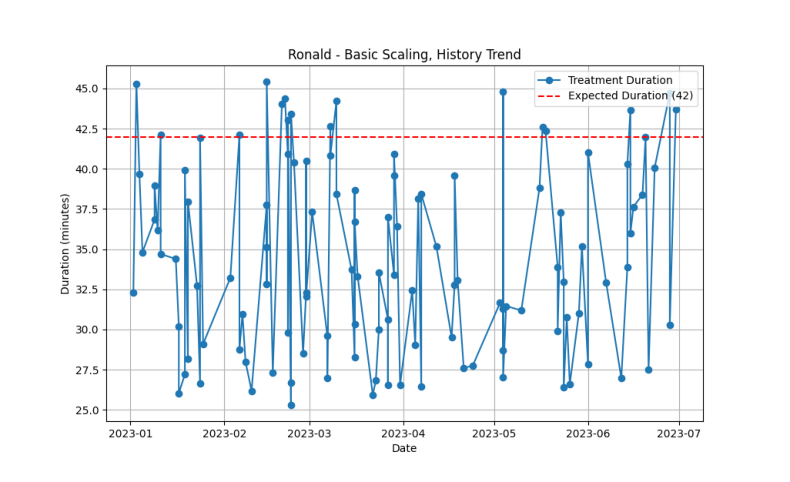

In [58]:
import pandas as pd
import requests
import tempfile
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

url3 = 'http://127.0.0.1:5000/performance_evaluation_chart'

dentists_file_path = "../Data/Dummy_Treatment.xlsx"
service_file_path = "../Data/Service_list.xlsx"

# Read the designated sheet from the Excel file
history_data =pd.read_excel(dentists_file_path, sheet_name="Dummy Treatments")
service_data = pd.read_excel(service_file_path, sheet_name="Main")


# Save the designated sheet to a temporary file2
with tempfile.NamedTemporaryFile(delete=False, suffix='.xlsx') as temp_file1:
    history_data.to_excel(temp_file1.name, index=False)
    temp_history_file_path = temp_file1.name

# Save the designated sheet to a temporary file2
with tempfile.NamedTemporaryFile(delete=False, suffix='.xlsx') as temp_file2:
    service_data.to_excel(temp_file2.name, index=False)
    temp_service_file_path = temp_file2.name

with open(temp_history_file_path, 'rb') as history_file, open(temp_service_file_path, 'rb') as service_file:
    files3 = {
        'file1': ('Dummy_Treatment.xlsx', history_file),
        'file2': ('Service_list.xlsx', service_file)
    }

    dentist_variable = {
        'dentist_name': 'Ronald',
        'treatment_name': 'Basic Scaling'
    }

    response3 = requests.post(url3, files=files3, data=dentist_variable)

    if response3.status_code == 200:
        print(f'Status Code: {response3.status_code}')

        image = Image.open(BytesIO(response3.content))
        
        plt.figure(figsize=(10, 6))
        plt.imshow(image)
        plt.axis('off')  
        plt.show()

    else:
        print(f"Error: {response3.status_code}")

# Clean up the temporary file
os.remove(temp_history_file_path)
os.remove(temp_service_file_path)

In [17]:
import pandas as pd
import requests
import tempfile
import os

url3 = 'http://127.0.0.1:5000/analyze_dentist_history'

dentists_file_path = "../Data/Dummy_Treatment.xlsx"
service_file_path = "../Data/Service_list.xlsx"

# Read the designated sheet from the Excel file
history_data =pd.read_excel(dentists_file_path, sheet_name="Dummy Treatments")
service_data = pd.read_excel(service_file_path, sheet_name="Main")


# Save the designated sheet to a temporary file2
with tempfile.NamedTemporaryFile(delete=False, suffix='.xlsx') as temp_file1:
    history_data.to_excel(temp_file1.name, index=False)
    temp_history_file_path = temp_file1.name

# Save the designated sheet to a temporary file2
with tempfile.NamedTemporaryFile(delete=False, suffix='.xlsx') as temp_file2:
    service_data.to_excel(temp_file2.name, index=False)
    temp_service_file_path = temp_file2.name

with open(temp_history_file_path, 'rb') as history_file, open(temp_service_file_path, 'rb') as service_file:
    files3 = {
        'file1': ('Dummy_Treatment.xlsx', history_file),
        'file2': ('Service_list.xlsx', service_file)
    }

    response3 = requests.post(url3, files=files3, data=dentist_variable)

    if response3.status_code == 200:
        print(f'Status Code: {response3.status_code}')
        print(response3.text)
 
    else:
        print(f"Error: {response3.status_code}")

# Clean up the temporary file
os.remove(temp_history_file_path)
os.remove(temp_service_file_path)

Status Code: 200
{
  "payload1": {
    "analyzed_sheet": "average_durations",
    "df_content": [
      {
        "Additional Root": 48.884434845224625,
        "Advanced Filling": 24.323328302248214,
        "Advanced Gum Treatment": 48.523827983882654,
        "Basic Filling": 51.59288958829579,
        "Basic Gum Treatment": 35.335104265758694,
        "Basic Scaling": 33.694480618823285,
        "Basic Tooth Extraction": 31.64343293380553,
        "Basic X-ray": 3.9628158295775444,
        "Consultation": 25.3135680484807,
        "Dental Post & Core": 71.97060442764442,
        "Dental Spa": 14.43032446965361,
        "Membership Consultation Perk": 31.72642413725763,
        "Mouth Guard": 36.18248189041754,
        "Premium Bridge": 71.40330431321196,
        "Premium Crown": 72.4197199420494,
        "Prevention Seal": 16.115378415761203,
        "Root Canal Treatment": 72.36980393891525,
        "Wear Protect": 35.68123468639256,
        "dentist_name": "Arnold"
      },
     

## Profit Optimization

In [14]:
import pandas as pd
import os
import requests
import tempfile
import json

url4 = 'http://127.0.0.1:5000/profit_optimization'

service_file_path = "../Data/Service_list.xlsx"

# Read the designated sheet from the Excel file
service_data = pd.read_excel(service_file_path, sheet_name="Main")


# Save the designated sheet to a temporary file
with tempfile.NamedTemporaryFile(delete=False, suffix='.xlsx') as temp_file1:
    service_data.to_excel(temp_file1.name, index=False)
    temp_service_file_path = temp_file1.name

with open(temp_service_file_path, 'rb') as service_file:
    files4 = {
        'file1': ('Service_list.xlsx', service_file),
    }

    input_payload = {
        "cost_list": [
            {
                'cost_id': 1,
                'cost_name': 'Internet',
                'cost_fee': 384000,
                'cost_type': 'Utility'
            },
            {
                'cost_id': 2,
                'cost_name': 'Electricity',
                'cost_fee': 450000,
                'cost_type': 'Utility'
            },
            {
                'cost_id': 3,
                'cost_name': 'Rent',
                'cost_fee': 4500000,
                'cost_type': 'Fixed'
            }
        ],
         "worker_payload":{
            'dentist_count': 3,
            'maximum_hour_per_week': 40,
            'average_salary': 8500000
        }
    }

    # Convert cost_payload to a JSON string
    data = {
        'cost_payload': json.dumps(input_payload)
    }

    response4 = requests.post(url4, files=files4, data=data)

    if response4.status_code == 200:
        print(f'Status Code: {response4.status_code}')
        print(response4.text)
    else:
        print(f"Error: {response4.status_code}")

# Clean up the temporary file
os.remove(temp_service_file_path)

Status Code: 200
{
  "model_information": {
    "best_individual": [
      2,
      158,
      34,
      21,
      9,
      40,
      142,
      9,
      5,
      1,
      91,
      1,
      9,
      99,
      5,
      1,
      0,
      1
    ],
    "fitness_value": 2147481000.0,
    "maximum_profit": 1294938838.8705,
    "model_efficiency": 92.54,
    "total_hour": 444.208
  },
  "optimize_treatments": {
    "optimize_count": [
      2,
      158,
      34,
      21,
      9,
      40,
      142,
      9,
      5,
      1,
      91,
      1,
      9,
      99,
      5,
      1,
      0,
      1
    ],
    "profit_contribution": [
      616936.0,
      38338700.0,
      3973767.0,
      3176250.0,
      680625.0,
      58153020.0,
      196238462.0,
      1458349.5015,
      190924.16749999998,
      0.0,
      55600526.800000004,
      318838.0,
      8899524.0,
      915578626.8915,
      10611915.0,
      849357.01,
      0.0,
      253017.5
    ],
    "total_hours": [
      1.4,
  